<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv(breast_cancer_csv)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data['diagnosis'].nunique()

2

In [4]:
print(data['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [5]:
data['diagnosis'] = data['diagnosis'].replace({'B': 0, 'M': 1})

In [6]:
data.shape

(569, 33)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [9]:
# Target
y = data['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [10]:
# Predictors
X = data.drop(columns=['diagnosis', 'Unnamed: 32'])
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
# SMOTE for imbalanced dataset

from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()

# how SMOTE works:
# print('Before', Counter(y_train))
# X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
# print('After', Counter(y_train_smt))

In [12]:
# before SMOTE
print(Counter(y))

# benign (0) has 357 observations
# malignant (1) has 212 observations
# imbalanced?

Counter({0: 357, 1: 212})


In [13]:
X, y = smt.fit_resample(X, y)
print(Counter(y))

Counter({1: 357, 0: 357})


In [30]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [32]:
# examine accuracy score, confusion matrix, classification report for that model.
LogReg.score(X_test, y_test)

0.9125874125874126

In [33]:
LogReg.coef_

array([[-1.70912573e-09, -3.56478133e-03, -6.57072558e-03,
        -2.17892510e-02, -3.49765700e-02, -3.57656158e-05,
        -1.01714989e-05,  2.24809785e-05,  1.15198670e-05,
        -6.89240680e-05, -2.71630762e-05, -1.41155030e-05,
        -5.19920857e-04, -8.37602628e-05,  7.00423832e-03,
        -3.25166356e-06, -4.64394240e-06, -4.80316137e-06,
        -2.17814299e-06, -8.42578528e-06, -1.31298480e-06,
        -3.28237433e-03, -8.18619402e-03, -1.98831916e-02,
         3.31705670e-02, -4.59574695e-05, -1.61759786e-06,
         4.01118466e-05,  8.45173179e-06, -9.45301986e-05,
        -2.87329267e-05]])

In [34]:
LogReg.intercept_

array([-0.00043961])

In [35]:
# accuracy score
from sklearn.metrics import accuracy_score

preds = LogReg.predict(X_train)
accuracy_score(y_train, preds)

0.8855140186915887

In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix
preds_test = LogReg.predict(X_test)
print(confusion_matrix(y_test, preds_test), "\n")

print(np.asarray([['TN = rly -ve ///', 'FP = actly -ve'], ['FN = actly +ve ///', 'TP = rly +ve']]))

[[136  12]
 [ 13 125]] 

[['TN = rly -ve ///' 'FP = actly -ve']
 ['FN = actly +ve ///' 'TP = rly +ve']]


In [37]:
# classification report
from sklearn.metrics import classification_report

#print(classification_report(y_test, preds_test, labels=['benign', 'malignant']))


### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [38]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X_train, y_train)

#linear kernel taking too much time, can try:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

SVC(C=1000)

In [39]:
# accuracy score

preds = clf.predict(X_train)
accuracy_score(y_train, preds)

0.5397196261682243

In [40]:
# confusion matrix
from sklearn.metrics import confusion_matrix
preds_test = clf.predict(X_test)
print(confusion_matrix(y_test, preds_test), "\n")

print(np.asarray([['TN = rly -ve ///', 'FP = actly -ve'], ['FN = actly +ve ///', 'TP = rly +ve']]))

[[ 27 121]
 [ 28 110]] 

[['TN = rly -ve ///' 'FP = actly -ve']
 ['FN = actly +ve ///' 'TP = rly +ve']]


In [41]:
# classification report
from sklearn.metrics import classification_report

#print(classification_report(y_test, preds_test, labels=['benign', 'malignant']))

### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [42]:
from sklearn.naive_bayes import GaussianNB

Gaussian = GaussianNB()
Gaussian.fit(X_train, y_train)

GaussianNB()

In [43]:
# accuracy score

preds = clf.predict(X_train)
accuracy_score(y_train, preds)

0.5397196261682243

In [44]:
# confusion matrix
from sklearn.metrics import confusion_matrix
preds_test = clf.predict(X_test)
print(confusion_matrix(y_test, preds_test), "\n")

print(np.asarray([['TN = rly -ve ///', 'FP = actly -ve'], ['FN = actly +ve ///', 'TP = rly +ve']]))

[[ 27 121]
 [ 28 110]] 

[['TN = rly -ve ///' 'FP = actly -ve']
 ['FN = actly +ve ///' 'TP = rly +ve']]


In [45]:
# classification report
from sklearn.metrics import classification_report

#print(classification_report(y_test, preds_test, labels=['benign', 'malignant']))

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [47]:
logreg_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [51]:
from sklearn.model_selection import GridSearchCV

LogReg = LogisticRegression()

finder = GridSearchCV(estimator=LogReg,
                     param_grid=logreg_params,
                     scoring='r2',
                     n_jobs=None,
                     return_train_score=True)

finder.fit(X_train, y_train)
print(finder.best_params_)

#outcome C:1, penalty: l2

C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Megan Yit\anaconda3\lib\site-packages\sklear

{'C': 1, 'penalty': 'l2'}


C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Megan Yit\anaconda3\lib\site-packages\sklear

In [52]:
finder.best_score_
#-1.029352761060078

-1.029352761060078

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [53]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['rbf'] #removed 'linear' because it was taking system too long to run
}

In [54]:
clf = svm.SVC()

finder = GridSearchCV(estimator=clf,
                     param_grid=svc_params,
                     scoring='r2',
                     n_jobs=None,
                     return_train_score=True)

finder.fit(X_train, y_train)
print(finder.best_params_)

#outcome C:10, gamma:0.001, kernel:rbf

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [55]:
finder.best_score_
#-0.5614491483181215

-0.5614491483181215

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

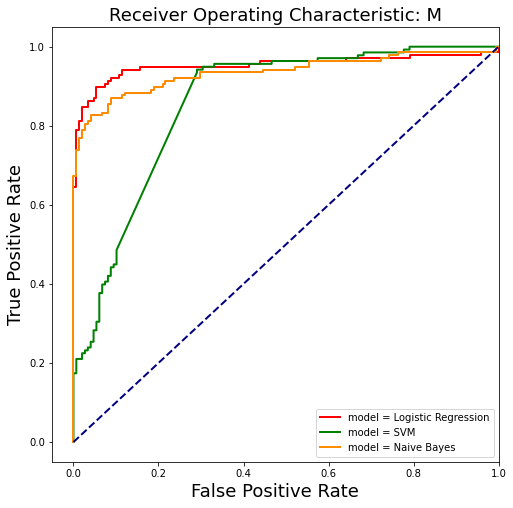

In [77]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

models = [{'label': 'Logistic Regression',
          'model': LogisticRegression(penalty='l2', C=1.0)},
         {'label': 'SVM',
         'model': svm.SVC(C=10, gamma=0.0001, kernel='rbf', probability=True)},
         {'label': 'Naive Bayes',
         'model': GaussianNB()}]

plt.figure(figsize=[8,8])

colors = ['r', 'g', 'darkorange']

for m, c in zip(models, colors):
    
    model = m['model'] #selects model at each iteration
    label=m['label']
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    plt.plot(fpr, tpr, color=c, lw=2, label="model = %s" %label)
             
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



